In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\bichdt4\Downloads\Sales Data.csv', encoding='latin1')
df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [3]:
df.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
df.head()

,ID,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


---
Thêm cột tháng, tháng-năm

In [5]:
df['Order Date']= df['Order Date'].astype('datetime64[ns]')
df['DateMonth']= df['Order Date'].dt.to_period('M')
df['Year']= df['Order Date'].dt.year
df.head()

,ID,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,DateMonth,Year
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,2019-12,2019
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,2019-12,2019
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,2019-12,2019
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,2019-12,2019
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,2019-12,2019


In [6]:
df['Year'].unique()

array([2019, 2020], dtype=int32)

---
Doanh thu theo tháng, tháng có doanh thu lớn nhất

In [7]:
sales = df.groupby(['DateMonth'])['Sales'].sum()
sales

DateMonth
2019-01    1813586.44
2019-02    2202022.42
2019-03    2807100.38
2019-04    3390670.24
2019-05    3152606.75
2019-06    2577802.26
2019-07    2647775.76
2019-08    2244467.88
2019-09    2097560.13
2019-10    3736726.88
2019-11    3199603.20
2019-12    4613443.34
2020-01       8670.29
Freq: M, Name: Sales, dtype: float64

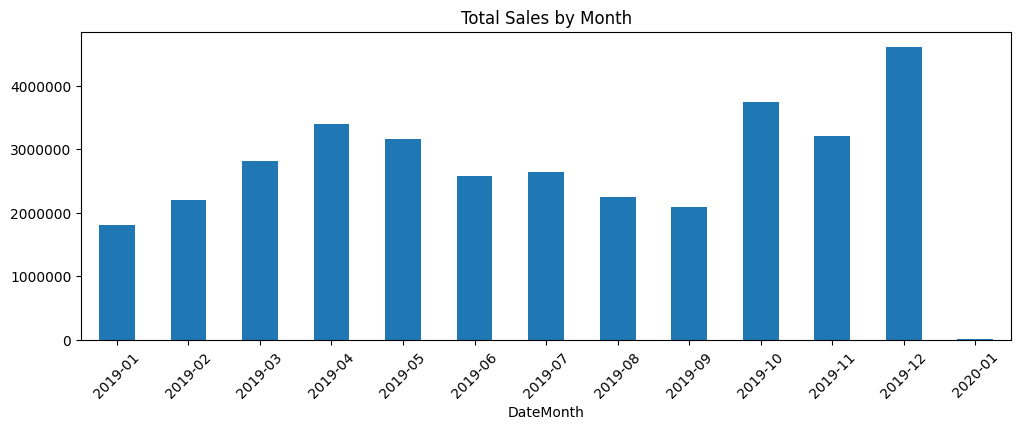

In [8]:
# months = df['DateMonth'].astype(str)
# print(months)
sales.plot(kind='bar',  figsize=(12,4))
plt.title('Total Sales by Month')   
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

---
Thành phố nào doanh thu tốt nhất

In [9]:
city = df.groupby('City')['Sales'].sum()

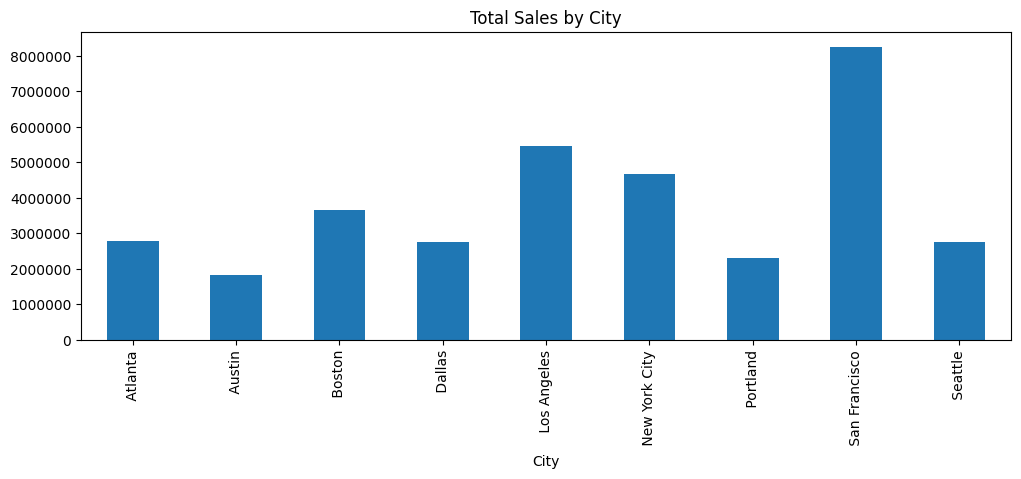

In [10]:
city.plot(kind='bar', figsize=(12,4))
plt.title('Total Sales by City')
plt.ticklabel_format(style='plain', axis='y')

---
Khung giờ nào được đặt hàng nhiều nhất

In [11]:
time = df.groupby('Hour')['Order ID'].count()

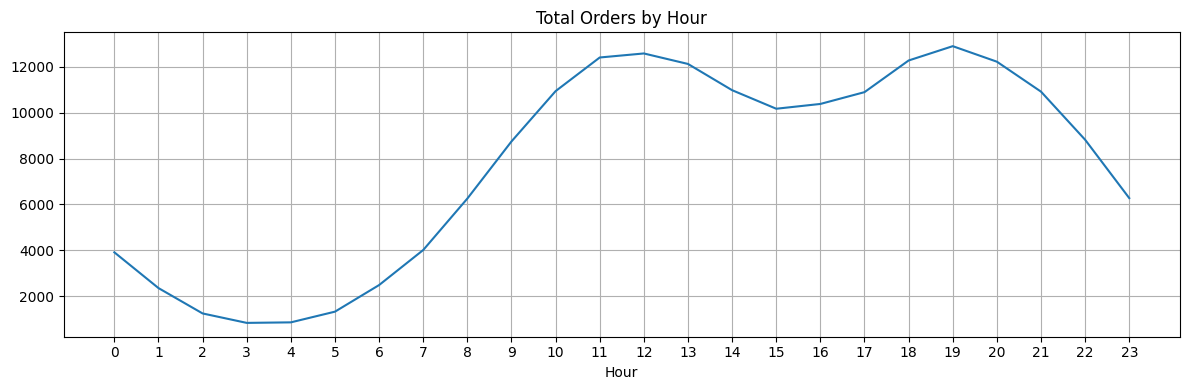

In [13]:
time.plot(kind='line', figsize=(12,4))
plt.title('Total Orders by Hour')
plt.xticks(df['Hour'].unique())
plt.grid()
plt.tight_layout()

---
Sản phẩm bán chạy nhất

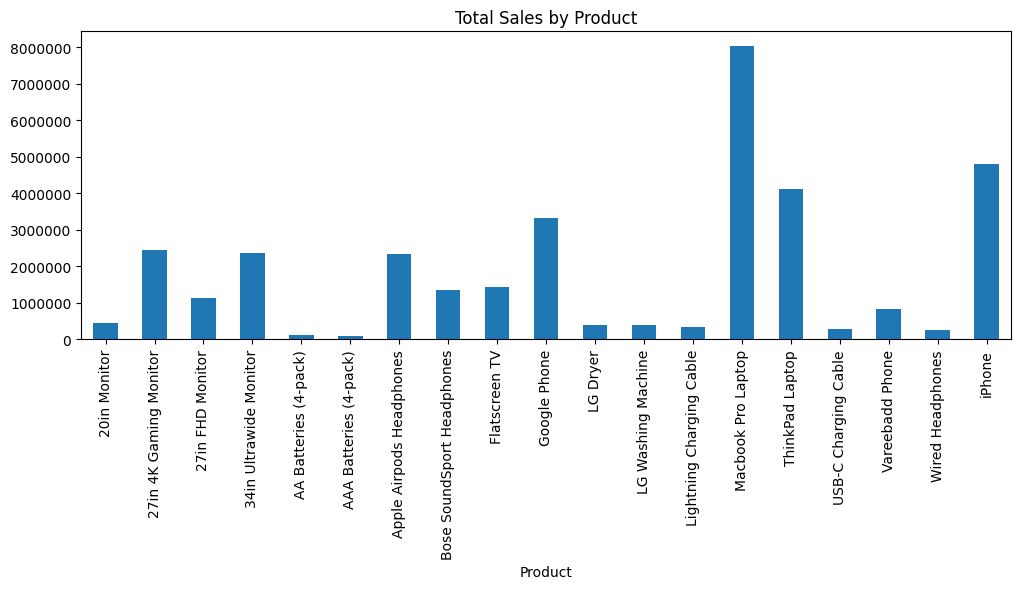

In [16]:
product = df.groupby('Product')['Sales'].sum().plot(kind='bar', figsize=(12,4))
plt.title('Total Sales by Product')
plt.ticklabel_format(style='plain', axis='y')

In [46]:
price = df.groupby('Product')['Price Each'].mean()
price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [60]:
product_group = df.groupby('Product')
keys = [pair for pair, df in product_group]
Quantity_Ordered = df.groupby('Product')['Quantity Ordered'].sum()

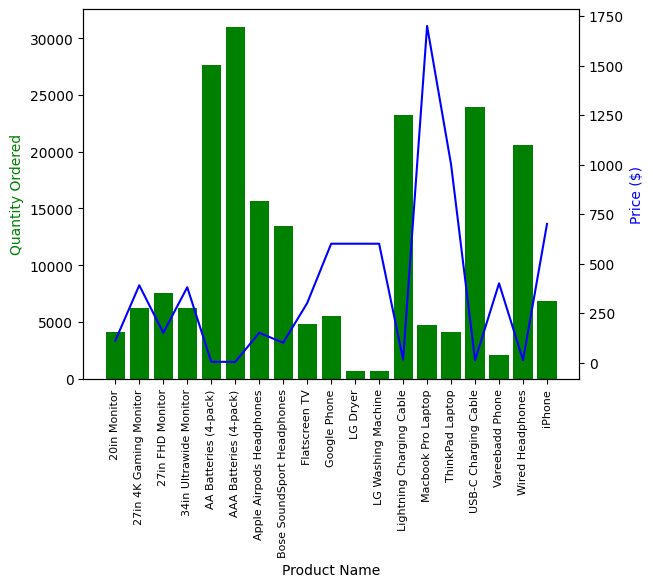

In [59]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, Quantity_Ordered, color='g')
ax2.plot(keys, price, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()